# Урок 1. Обработка изображений и компьютерное зрение
### Домашнее задание
Данные, необходимые для этого модуля:
* parrot.jpeg

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# import scipy
import imageio

## Загрузка цветного изображения

In [2]:
img = imageio.imread('parrot.jpeg')
img = img.astype(np.float32) / 255.
print(img.shape)

(597, 900, 3)


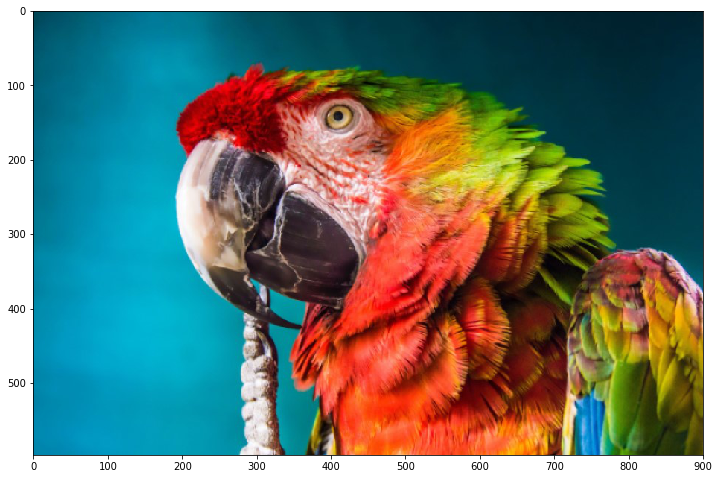

In [3]:
plt.figure(figsize=(12, 12))
plt.imshow(img)

## Отображение фрагмента

In [4]:
img_crop = np.copy(img[70:500, 200:500])
print(img_crop.shape)

(430, 300, 3)


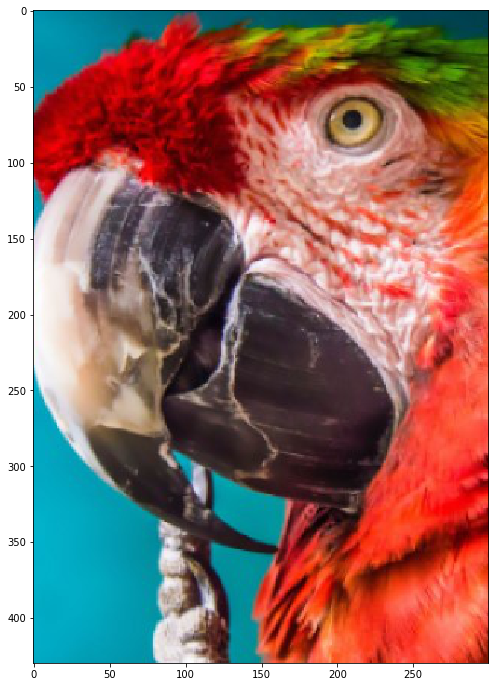

In [5]:
plt.figure(figsize=(12, 12))
plt.imshow(img_crop)

## Удаление фрагмента из картинки

In [6]:
img_crop[50:130, 100:120] = 50

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


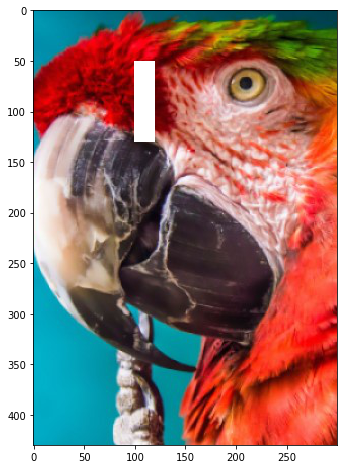

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(img_crop)

## Получение ЧБ изображения из цветного

In [8]:
img_bw = np.mean(img, axis=2)

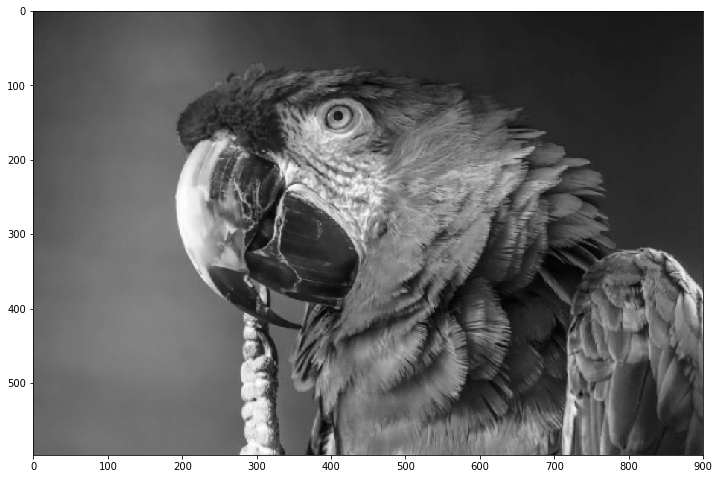

In [9]:
plt.figure(figsize=(12, 12))
plt.imshow(img_bw, cmap='gray')

In [10]:
import scipy.signal

In [11]:
win_size = (11, 11)
w = np.ones(win_size, dtype=np.float32)
w = w / np.sum(w)

In [12]:
%%time

out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

Wall time: 1.05 s


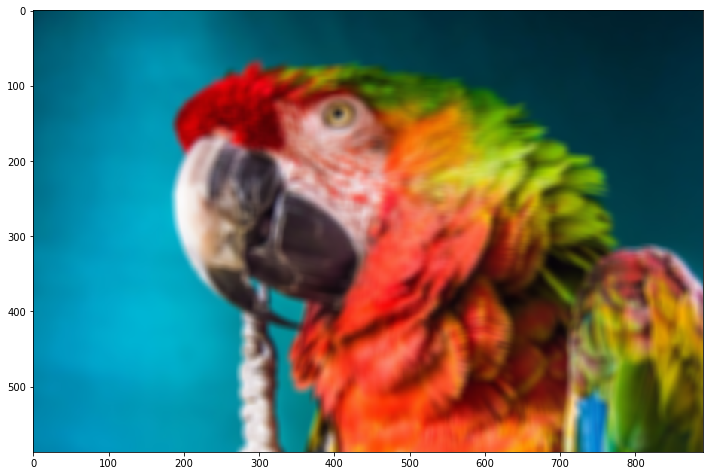

In [13]:
plt.figure(figsize=(12, 12))
plt.imshow(out_img)

## Цветовое пространство HSV

In [14]:
from skimage.color import rgb2hsv, hsv2rgb

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [15]:
img_hsv = rgb2hsv(img)

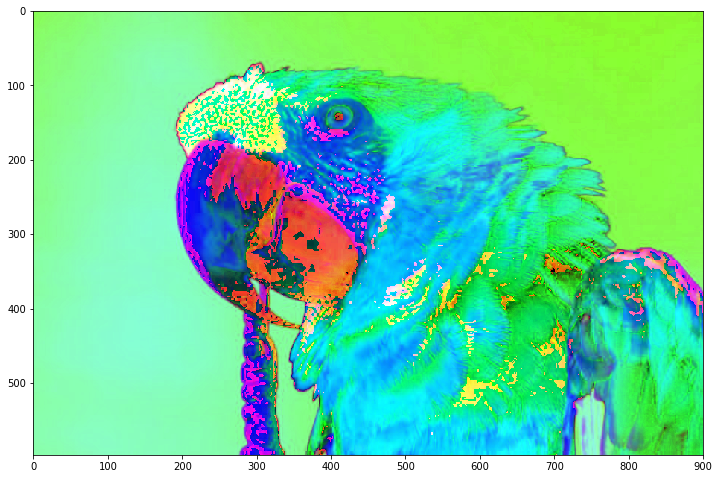

In [16]:
plt.figure(figsize=(12, 12))
plt.imshow(img_hsv)

#### С картинкой все в порядке. Функция imshow не правильно отображает HSV-картинки. При обратном переводе в RGB все восстановится

## Линейное увеличение насыщенности

In [17]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] *= 4
img_new = hsv2rgb(img_hsv_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


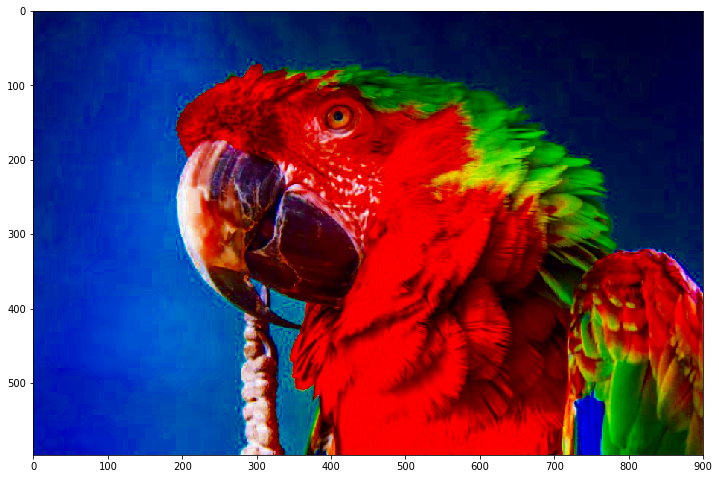

In [18]:
plt.figure(figsize=(12, 12))
plt.imshow(img_new)

## Изменение тона

In [19]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] /= 5
img_new = hsv2rgb(img_hsv_new)

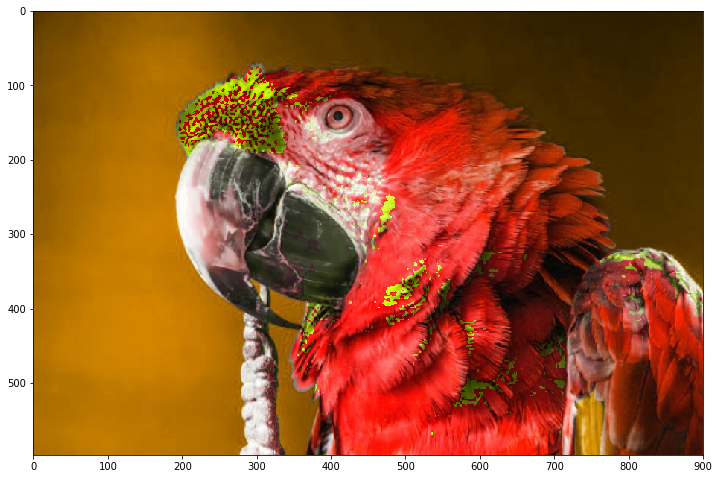

In [20]:
plt.figure(figsize=(12, 12))
plt.imshow(img_new)